# Lecture 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data
from skimage.exposure import histogram

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[15,10]

### Entropy

In [3]:
def entropy(p):
    i = p > 0
    return -sum(p[i]*np.log2(p[i]))

In [4]:
I = data.camera()

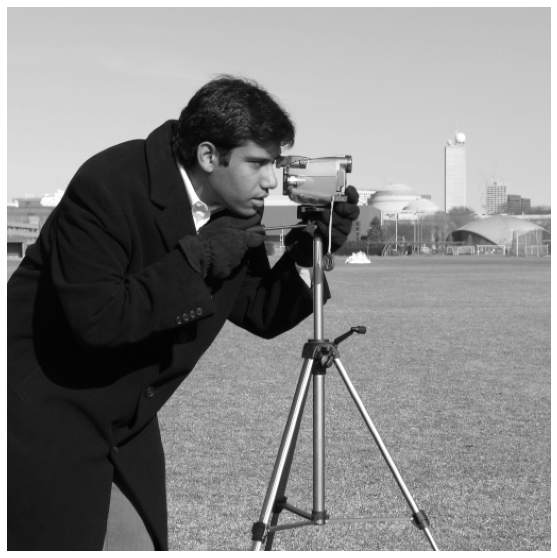

In [5]:
plt.imshow(I).axes.set_axis_off()

In [6]:
p, x = histogram(I,normalize=True)

<BarContainer object of 256 artists>

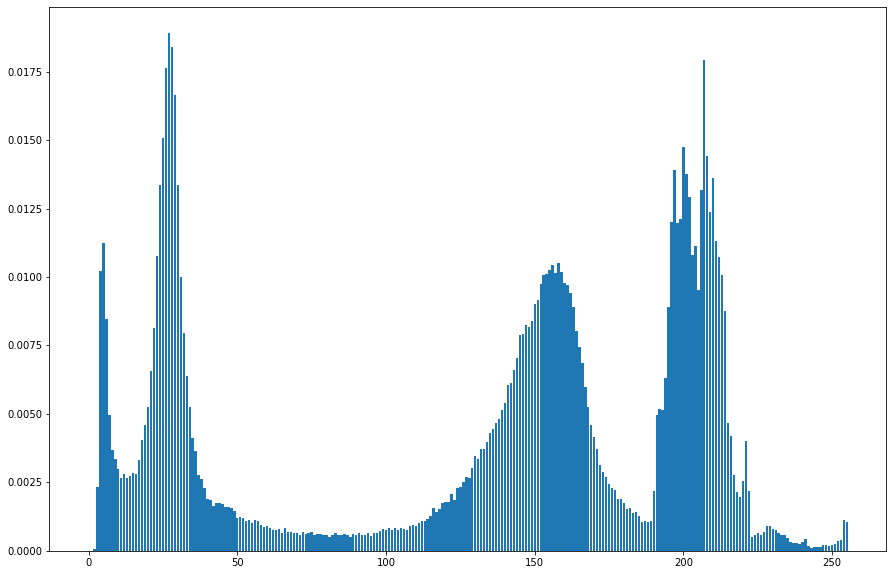

In [7]:
plt.bar(x,p)

In [8]:
entropy(p)

7.231695011055708

In [9]:
J = np.bitwise_and(I,2**7+2**6+2**5+2**4)

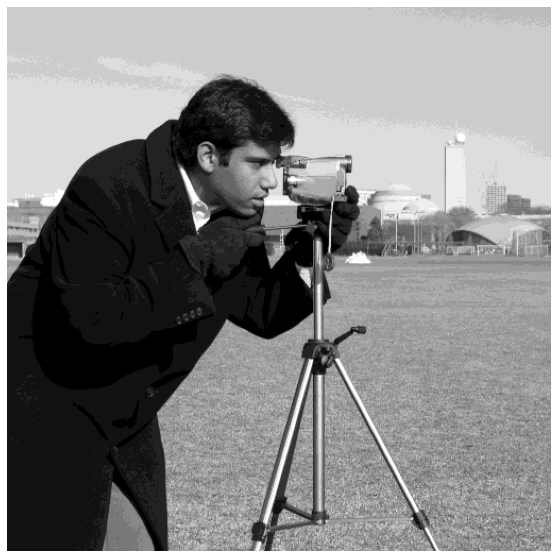

In [10]:
plt.imshow(J).axes.set_axis_off()

In [11]:
p2, x2 = histogram(J//16,normalize=True)

<BarContainer object of 16 artists>

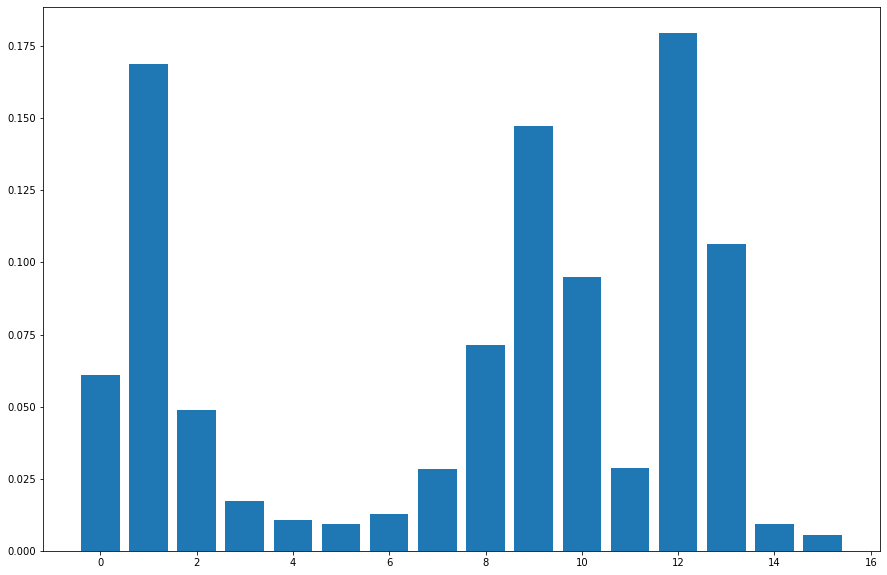

In [12]:
plt.bar(x2,p2)

In [13]:
entropy(p2)

3.3927289176776685

### Image quality

In [14]:
def rmse(a,b):
    return np.sqrt(((a+0.0-b)**2).mean())

In [15]:
def psnr(a,b):
    return 20*np.log10(255.0/rmse(a,b))

In [16]:
rmse(I,J)

8.825488535729175

In [17]:
psnr(I,J)

29.216028505954455

### Discrete cosine transform (DCT)

In [18]:
from scipy.fftpack import dct, idct

In [19]:
s = I[256,:]

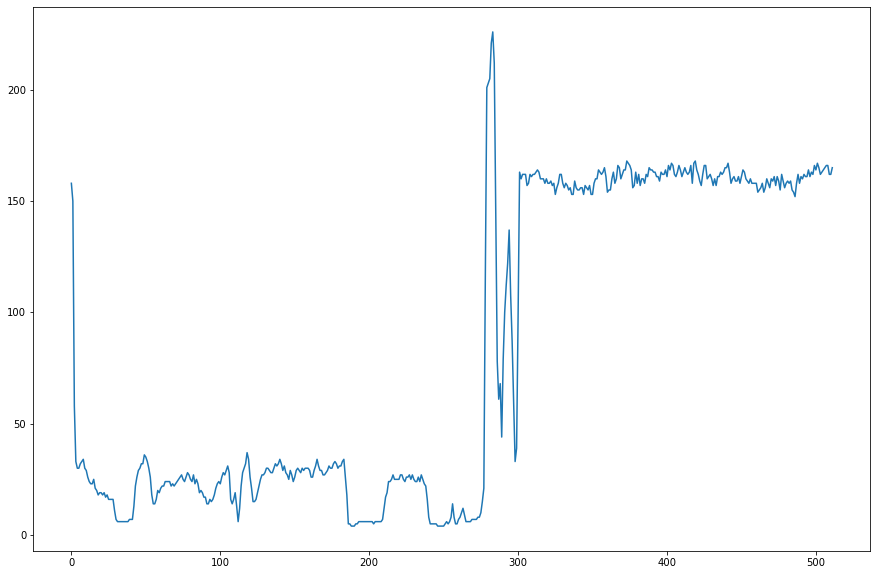

In [20]:
plt.plot(s)

In [21]:
d = dct(s, norm='ortho')

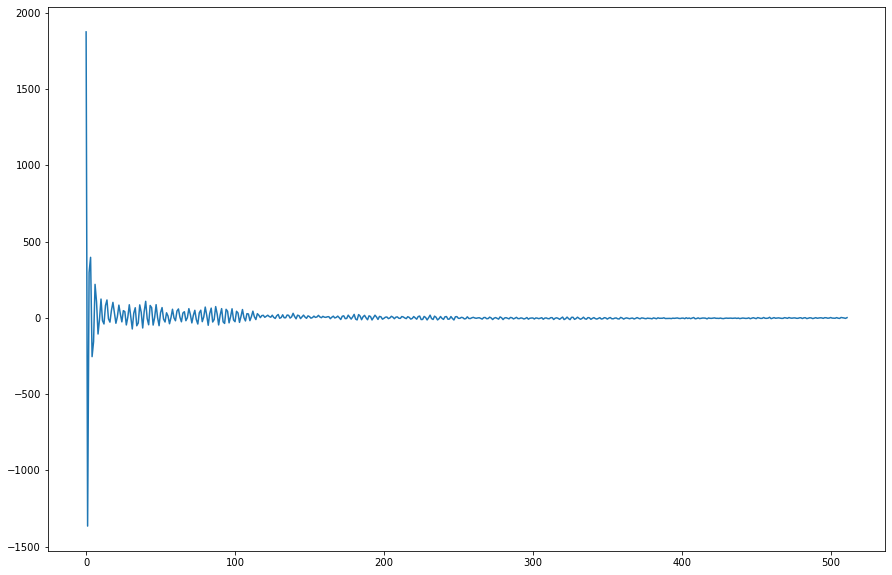

In [22]:
plt.plot(d)

In [23]:
r = idct(d, norm='ortho')

In [24]:
rmse(s,r)

2.57809857036428e-14

### 2-D DCT

In [25]:
D = dct(dct(I, norm='ortho').T, norm='ortho').T

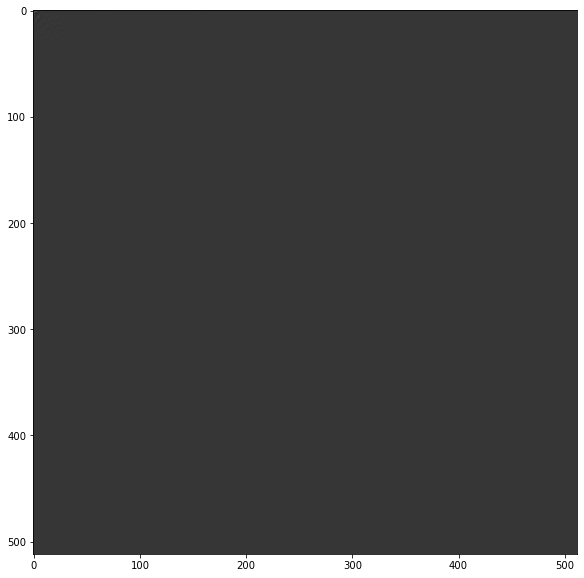

In [26]:
plt.imshow(D)

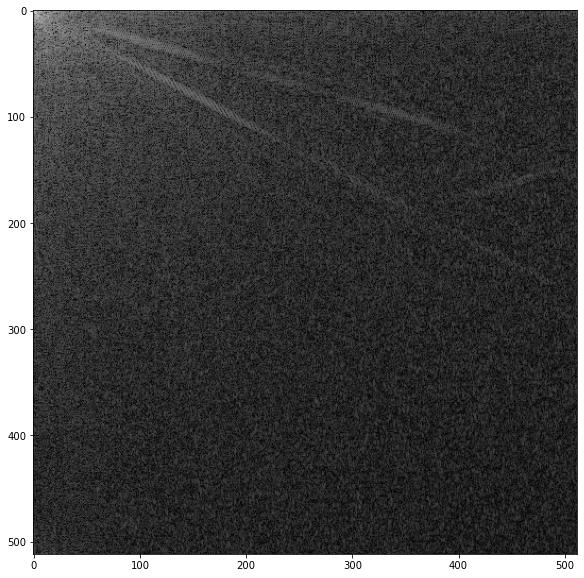

In [27]:
plt.imshow(np.log(abs(D)+1.0))

In [28]:
R = idct(idct(D, norm='ortho').T, norm='ortho').T

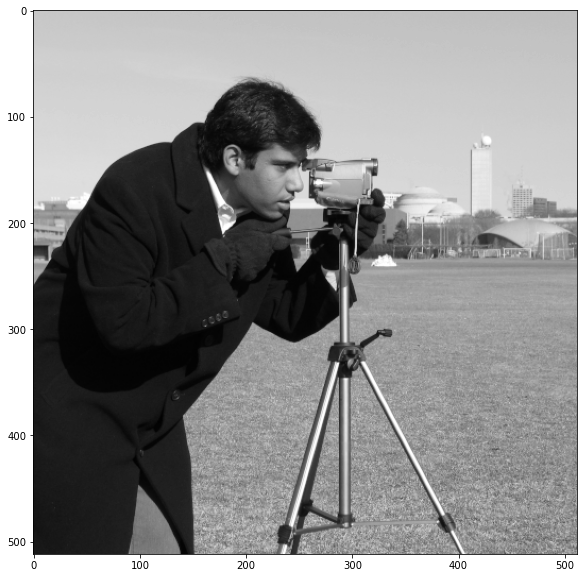

In [29]:
plt.imshow(R)

In [30]:
rmse(I,R)

5.017074426151576e-14

### Blockwise DCT

In [31]:
m,n = I.shape
B=I.reshape(m//8,8,n//8,8)

In [32]:
B.shape

(64, 8, 64, 8)

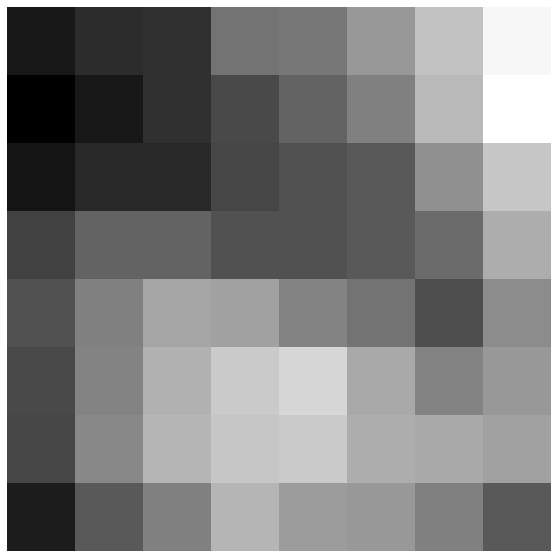

In [33]:
plt.imshow(B[20,:,30,:]).axes.set_axis_off()

In [34]:
def blockwise_dct2(a):
    return dct(dct(a, axis=1, norm='ortho'), axis=3, norm='ortho')

def blockwise_idct2(a):
    return idct(idct(a, axis=1 , norm='ortho'), axis=3 , norm='ortho')

In [35]:
D = blockwise_dct2(B)

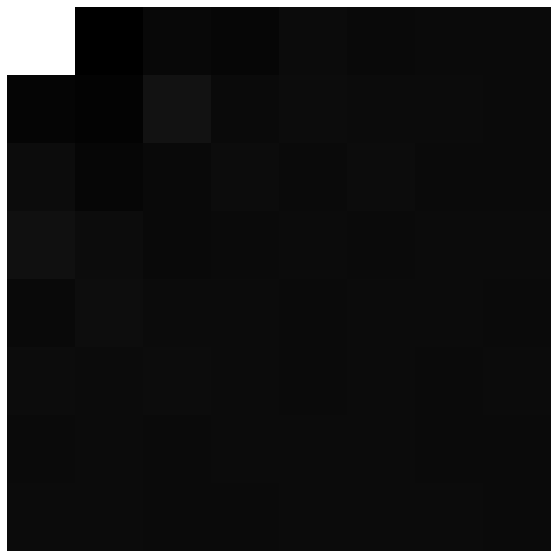

In [36]:
plt.imshow(D[20,:,30,:]).axes.set_axis_off()

In [37]:
print(D[20,:,30,:].astype(int))

[[1419  -64  -17  -26    4   -8   -1   -4]
 [ -32  -42   41   -1    7    0    0   -1]
 [   6  -27   -7    6   -1    7   -5   -2]
 [  32    5  -12   -1    2   -2    2    0]
 [ -10   13    0    0   -1    1    2   -5]
 [   7    0    5    1    0    0   -2    1]
 [  -4    0   -5    4    2    0   -2   -1]
 [   0    3   -1   -1    0    1    0   -1]]


### Quantization

In [38]:
Q = (D/16).astype(np.byte)

In [39]:
print(Q[20,:,30,:])

[[88 -4 -1 -1  0  0  0  0]
 [-2 -2  2  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [40]:
J=blockwise_idct2(Q*16.0).reshape(m,n).clip(0,255)

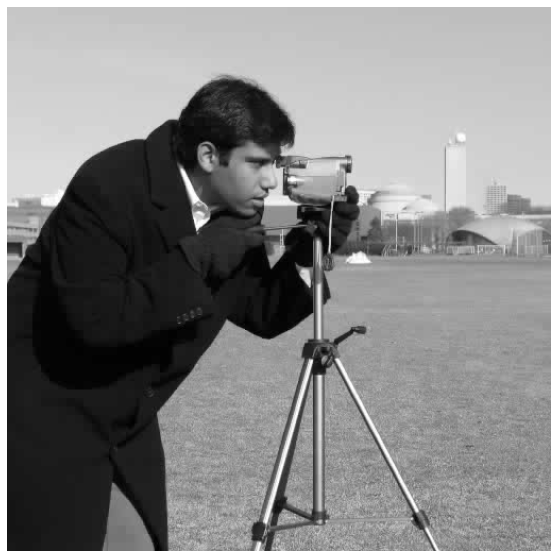

In [41]:
plt.imshow(J).axes.set_axis_off()

In [42]:
rmse(I,J)

5.188442255622661

In [43]:
p3,x3 = histogram(Q, normalize=True)

<BarContainer object of 164 artists>

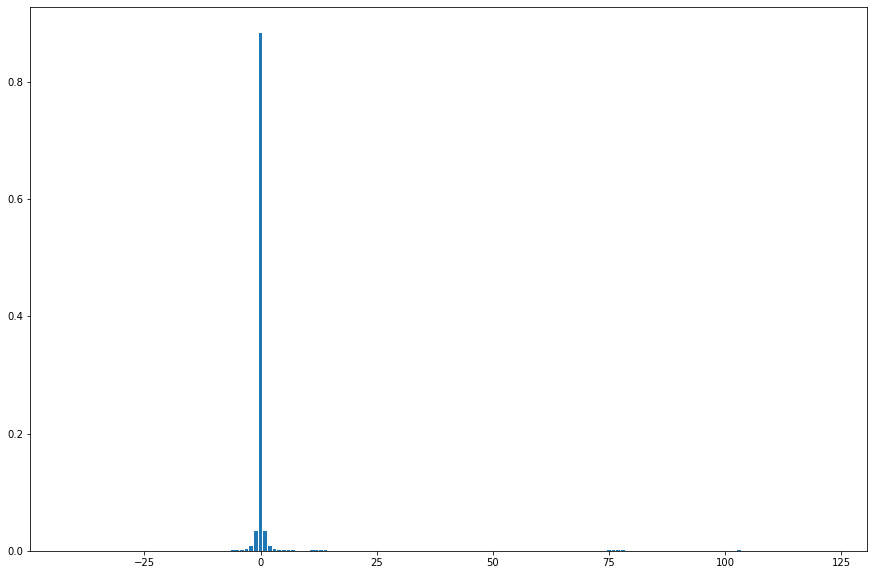

In [44]:
plt.bar(x3,p3)

In [45]:
entropy(p3)

0.9507197792222454